In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import tqdm
import json

import matplotlib.pyplot as plt

### Setting Directory

In [2]:

image_dir = 'D:\\aia_synoptic_copy_1'
# Path to the JSON file
file_path = 'D:\\Dissertation\\Kp data\\kpdata.json'




### Opening Kp and converting to Dataframe
#### Export as CSV

                   datetime   Kp
0 2010-01-01 00:00:00+00:00  0.0
1 2010-01-01 03:00:00+00:00  0.0
2 2010-01-01 06:00:00+00:00  0.0
3 2010-01-01 09:00:00+00:00  0.0
4 2010-01-01 12:00:00+00:00  0.0


C:\Users\mirzi\AppData\Local\Temp\ipykernel_27968\802931089.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['datetime'].dt.to_period('M')


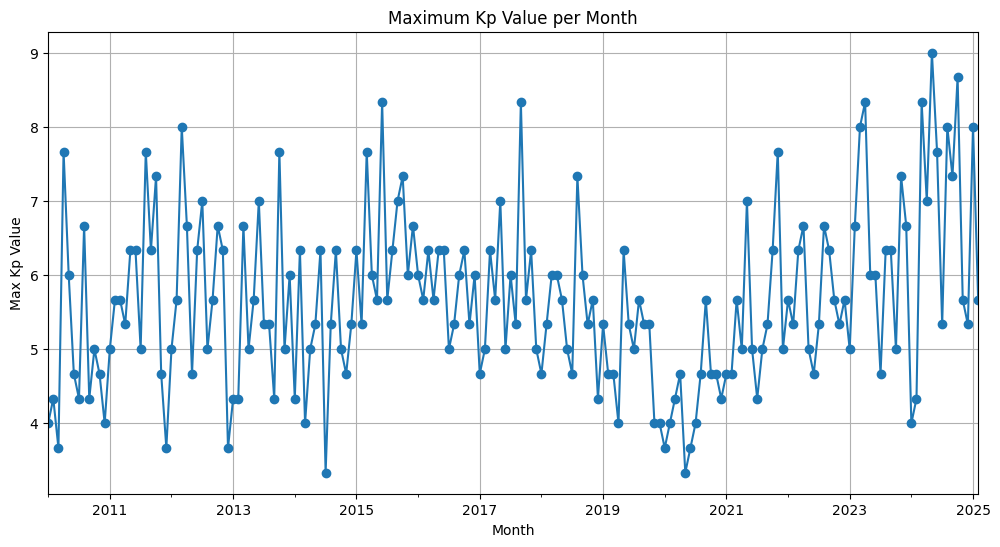

In [3]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert datetime and Kp values to numpy arrays
datetime_array = np.array(data['datetime'])
Kp = np.array(data['Kp'])

df = pd.DataFrame({'datetime': datetime_array, 'Kp': Kp})
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime format
print(df.head())

df.to_csv('D:\\Dissertation\\Kp data\\kpdata.csv', index=False)
# Resample the dataframe to get the maximum Kp value per month
df['year_month'] = df['datetime'].dt.to_period('M')
max_kp_per_month = df.groupby('year_month')['Kp'].max()

# Plot the line graph
plt.figure(figsize=(12, 6))
max_kp_per_month.plot(kind='line', marker='o')
plt.title('Maximum Kp Value per Month')
plt.xlabel('Month')
plt.ylabel('Max Kp Value')
plt.grid(True)
plt.show()

### Making list of images

In [4]:
# List all files in the image directory
image_files = []
# for root, dirs, files in os.walk(image_dir):
#     image_files += [os.path.join(root, f) for f in os.listdir(root) if f.endswith('.fits')]
    # image_files += [os.path.join(image_directory, f).replace('D:\\Dissertation\\Preprocessing\\', '/content/') for f in os.listdir(image_directory) if f.endswith('.jp2')]
    # image_files = [f.replace('\\', '/') for f in image_files]
    
image_files += [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.fits')]
print(f'Found {len(image_files)} Image files')
print(image_files[:5])

Found 121972 Image files
['D:\\aia_synoptic_copy_1\\AIA20100513_0000_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0100_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0200_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0300_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0400_0193.fits']


#### Checking for missing or extra images

Total days: 5144
Days with irregular image counts: 1471
Total missing images: 1484

Days with irregular image counts:
Date: 2012-11-14, Images: 1
Date: 2014-11-24, Images: 1
Date: 2010-10-20, Images: 5
Date: 2017-11-08, Images: 5
Date: 2020-07-20, Images: 5
Date: 2010-10-01, Images: 7
Date: 2010-11-23, Images: 8
Date: 2010-12-13, Images: 8
Date: 2011-03-03, Images: 8
Date: 2016-08-10, Images: 8
Date: 2018-06-28, Images: 8
Date: 2013-06-20, Images: 9
Date: 2013-08-21, Images: 9
Date: 2021-04-29, Images: 9
Date: 2015-12-27, Images: 11
Date: 2013-04-09, Images: 12
Date: 2016-08-02, Images: 12
Date: 2015-04-01, Images: 13
Date: 2011-12-11, Images: 14
Date: 2010-07-14, Images: 15
Date: 2011-01-27, Images: 15
Date: 2016-05-09, Images: 15
Date: 2010-11-04, Images: 16
Date: 2013-04-17, Images: 16
Date: 2017-10-23, Images: 16
Date: 2022-04-20, Images: 16
Date: 2010-07-15, Images: 17
Date: 2010-10-28, Images: 17
Date: 2012-04-04, Images: 17
Date: 2013-04-03, Images: 17
Date: 2015-05-13, Images: 

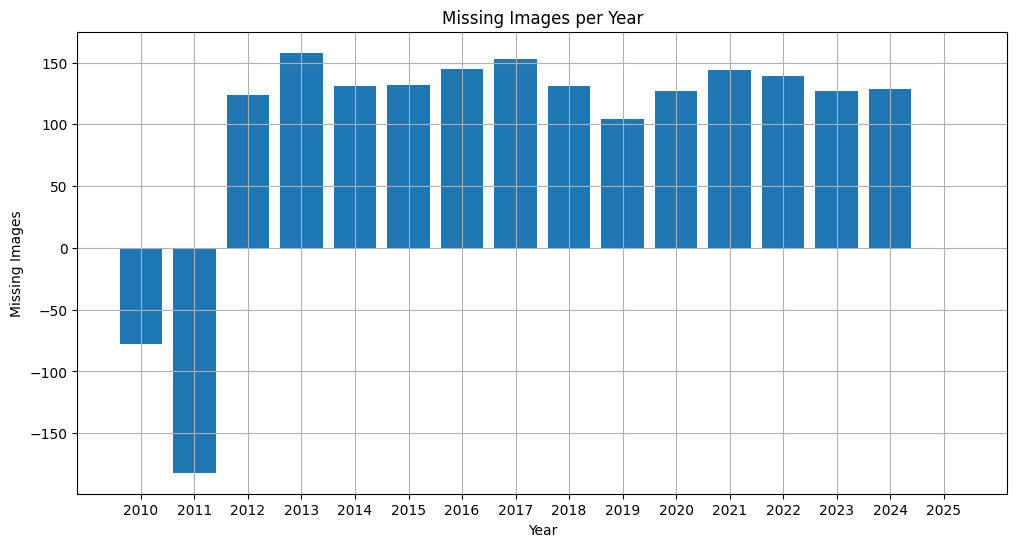

In [5]:

# Extract dates from image filenames
date_counts = {}
for image_path in image_files:
    image_filename = image_path.split('\\')[-1]
    
    # Extract date components from filename
    try:
        year = image_filename[3:7]
        month = image_filename[7:9]
        day = image_filename[9:11]
        # Create a date string
        date_str = f"{year}-{month}-{day}"
        
        # Increment count for this date
        if date_str in date_counts:
            date_counts[date_str] += 1
        else:
            date_counts[date_str] = 1
    except IndexError:
        print(f"Error processing filename: {image_filename}")
        continue

irregular_days = {}
missing_images_count = 0
# Check which days don't have exactly 24 images
for date, count in date_counts.items():
    if count != 24:
        # print(f"Date: {date}, Images: {count}")
        irregular_days[date] = count
        missing_images_count += 24 - count
    

print(f"Total days: {len(date_counts)}")
print(f"Days with irregular image counts: {len(irregular_days)}")
print(f"Total missing images: {missing_images_count}")

# Print the irregular days and their image counts
if irregular_days:
    print("\nDays with irregular image counts:")
    for date, count in sorted(irregular_days.items(), key=lambda x: x[1]):
        print(f"Date: {date}, Images: {count}")
else:
    print("All days have exactly 24 images.")
    
# plot of images missing per year
missing_images_per_year = {}
for date, count in date_counts.items():
    year = date.split('-')[0]
    if year in missing_images_per_year:
        missing_images_per_year[year] += 24 - count
    else:
        missing_images_per_year[year] = 24 - count

plt.figure(figsize=(12, 6))
plt.bar(missing_images_per_year.keys(), missing_images_per_year.values())
plt.title('Missing Images per Year')
plt.xlabel('Year')
plt.ylabel('Missing Images')
plt.grid(True)
plt.show()


In [ ]:
# Dictionary to store the first image for each year-month-day-hour combination
unique_images = {}
duplicate_count = 0


# Process each image file
for i in range(len(image_files)):
    image_path = image_files[i]
    image_filename = image_path.split('\\')[-1]
    
    # Extract date and time components
    try:
        year = image_filename[3:7]
        month = image_filename[7:9]
        day = image_filename[9:11]
        hour = image_filename[12:14]
        
        # Create a unique key for this datetime
        datetime_key = f"{year}-{month}-{day}-{hour}"
        # If this datetime hasn't been seen before, add it to the dictionary
        if datetime_key not in unique_images:
            unique_images[datetime_key] = image_path
        else:
            duplicate_count += 1
    except IndexError:
        print(f"Error processing filename: {image_filename}")
        continue

# Create a new list with only unique images
unique_image_files = list(unique_images.values())

# Filter out images from 2019 and later
filtered_image_files = []
for image_path in unique_image_files:
    image_filename = image_path.split('\\')[-1]
    
    # Extract date and time components
    try:
        year = image_filename[3:7]
        month = image_filename[7:9]
        day = image_filename[9:11]
        hour = image_filename[12:14]
        
        date = datetime.datetime(int(year), int(month), int(day), int(hour))
        if date < datetime.datetime(2018, 12, 10, 0):
            filtered_image_files.append(image_path)

    except Exception as e:
        print(f"Error processing filename: {image_filename}")
        continue    
        
# Update with the filtered list
unique_image_files = filtered_image_files

# Update the image_files list
image_files = unique_image_files

# Print results
print(f"Original number of images: {len(image_files)}")
print(f"Number of unique images: {len(unique_image_files)}")
print(f"Number of duplicate images removed: {duplicate_count}")

# Update the image_files list
image_files = unique_image_files

Original number of images: 71317
Number of unique images: 71317
Number of duplicate images removed: 821


### Grouping images by 10

In [7]:
count = 0
group = []
for i in range(0, len(image_files), 10):
    group += [image_files[i:i+10]]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
group = group[0: -1]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
print(group[-1])

7132
10
7
[['D:\\aia_synoptic_copy_1\\AIA20100513_0000_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0100_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0200_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0300_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0400_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0500_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0600_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0700_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0800_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_0900_0193.fits'], ['D:\\aia_synoptic_copy_1\\AIA20100513_1000_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1100_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1200_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1300_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1400_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1500_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1600_0193.fits', 'D:\\aia_synoptic_copy_1\\AIA20100513_1700_0193.fit

In [8]:
list_of_dates = []
for i in group:
    last_image = i[-1].split('\\')[-1]
    year = last_image[3:7]
    month = last_image[7:9]
    day = last_image[9:11]
    hour = last_image[12:14]
    date = datetime.datetime(int(year), int(month), int(day), int(hour))
    list_of_dates.append(date)
print(len(list_of_dates))
for date in list_of_dates:
    print(date)


7131
2010-05-13 09:00:00
2010-05-13 19:00:00
2010-05-14 05:00:00
2010-05-14 15:00:00
2010-05-15 01:00:00
2010-05-15 11:00:00
2010-05-15 21:00:00
2010-05-17 07:00:00
2010-05-17 17:00:00
2010-05-18 03:00:00
2010-05-18 13:00:00
2010-05-19 03:00:00
2010-05-19 13:00:00
2010-05-19 23:00:00
2010-05-20 09:00:00
2010-05-20 19:00:00
2010-05-21 05:00:00
2010-05-21 15:00:00
2010-05-22 01:00:00
2010-05-22 11:00:00
2010-05-22 21:00:00
2010-05-23 07:00:00
2010-05-23 17:00:00
2010-05-24 03:00:00
2010-05-24 13:00:00
2010-05-24 23:00:00
2010-05-25 09:00:00
2010-05-25 19:00:00
2010-05-26 05:00:00
2010-05-26 15:00:00
2010-05-27 01:00:00
2010-05-27 11:00:00
2010-05-27 22:00:00
2010-05-28 08:00:00
2010-05-28 18:00:00
2010-05-30 04:00:00
2010-05-30 14:00:00
2010-05-31 00:00:00
2010-05-31 10:00:00
2010-05-31 20:00:00
2010-06-01 06:00:00
2010-06-01 16:00:00
2010-06-02 02:00:00
2010-06-02 12:00:00
2010-06-02 22:00:00
2010-06-03 08:00:00
2010-06-03 18:00:00
2010-06-04 04:00:00
2010-06-04 14:00:00
2010-06-05 01:0

In [9]:
matched_kp = []
matched_kp_index = []
# Convert datetime column to datetime type if it's not already and remove timezone information
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
for i in range(len(list_of_dates)):
    date = list_of_dates[i]
    date = date + datetime.timedelta(days=2)
    match = df[df['datetime'] >= date][0:1]
    if match.empty:
        print(f'No match found for {date}')
    matched_kp += match['datetime'].tolist()
    matched_kp_index += match.index.tolist()
    
print(len(matched_kp))
print(len(matched_kp_index))
print(matched_kp[:5])
print(matched_kp_index[:5])
print(list_of_dates[:5])

7131
7131
[Timestamp('2010-05-15 09:00:00'), Timestamp('2010-05-15 21:00:00'), Timestamp('2010-05-16 06:00:00'), Timestamp('2010-05-16 15:00:00'), Timestamp('2010-05-17 03:00:00')]
[1075, 1079, 1082, 1085, 1089]
[datetime.datetime(2010, 5, 13, 9, 0), datetime.datetime(2010, 5, 13, 19, 0), datetime.datetime(2010, 5, 14, 5, 0), datetime.datetime(2010, 5, 14, 15, 0), datetime.datetime(2010, 5, 15, 1, 0)]


In [10]:

max_Kp_values = []
for index in matched_kp_index:
    kp_values = Kp[index: index + 9]
    max_Kp = max(kp_values)
    max_Kp_values.append(max_Kp)
print(len(max_Kp_values))  



7131


7131
7131
                 date
0 2010-05-15 09:00:00
1 2010-05-15 21:00:00
2 2010-05-16 06:00:00
3 2010-05-16 15:00:00
4 2010-05-17 03:00:00
count    7131.000000
mean        2.859166
std         1.357914
min         0.000000
25%         2.000000
50%         2.667000
75%         3.667000
max         8.333000
Name: Kp, dtype: float64


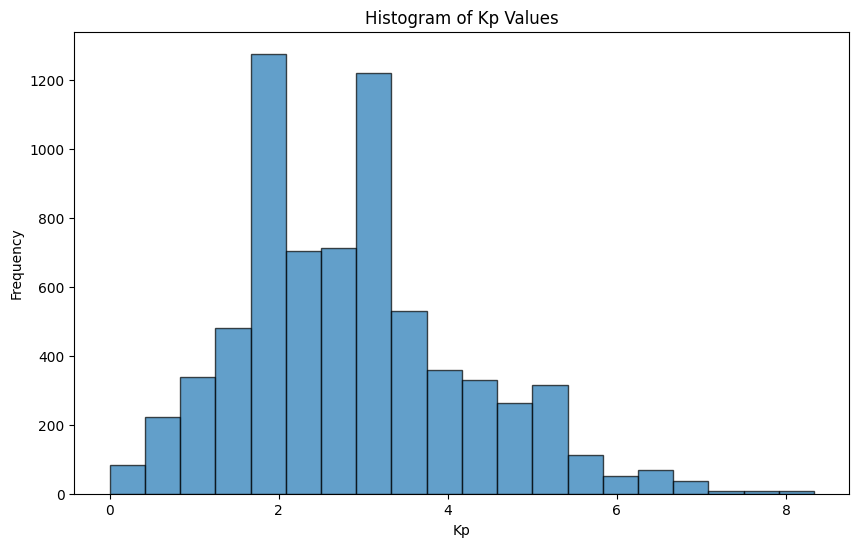

In [11]:
# Convert group to a DataFrame and export as CSV
print(len(group))
print(len(max_Kp_values))

matched_kp_dates_df = pd.DataFrame({'date': matched_kp})
print(matched_kp_dates_df.head())
matched_kp_dates_df.to_csv('D:\\New folder (2)\\matched_kp_dates_full.csv', index=False)

group_df = pd.DataFrame({'Images': group, 'Kp': max_Kp_values})
group_df.to_csv('D:\\New folder (2)\\dataset_full.csv', index=False)

# Calculate statistics of Kp values
kp_stats = group_df['Kp'].describe()
print(kp_stats)


# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()




1189
1189
count    1189.000000
mean        2.864036
std         1.355147
min         0.000000
25%         2.000000
50%         2.667000
75%         3.667000
max         7.667000
Name: Kp, dtype: float64


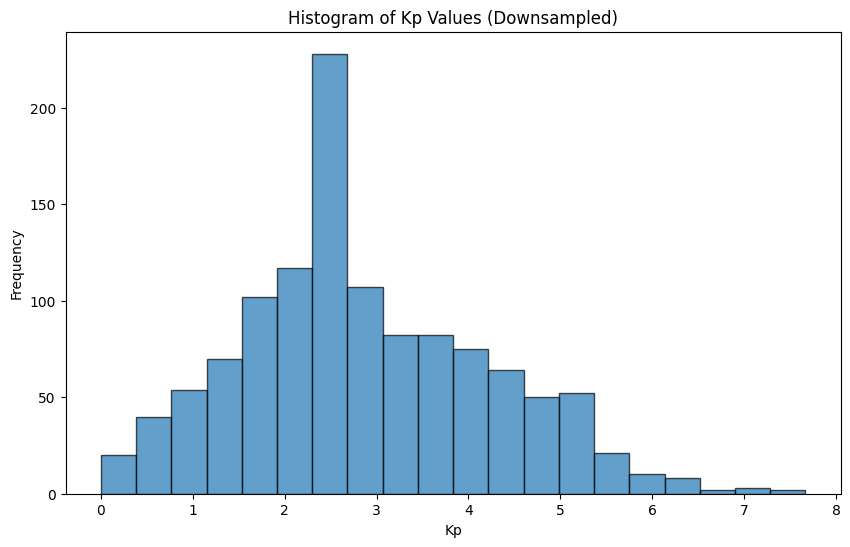

In [12]:
matched_kp_dates_df = matched_kp_dates_df[::6]
matched_kp_dates_df.to_csv('D:\\New folder (2)\\matched_kp_dates.csv', index=False)
print(len(matched_kp_dates_df))
group_df = group_df[::6]
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)
print(len(group_df))

# Calculate statistics of Kp values for the downsampled group_df
kp_stats_downsampled = group_df['Kp'].describe()
print(kp_stats_downsampled)

# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values (Downsampled)')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()


Number of unique Kp values: 24
Unique Kp values:
[0.    0.333 0.667 1.    1.333 1.667 2.    2.333 2.667 3.    3.333 3.667
 4.    4.333 4.667 5.    5.333 5.667 6.    6.333 6.667 7.    7.333 7.667]


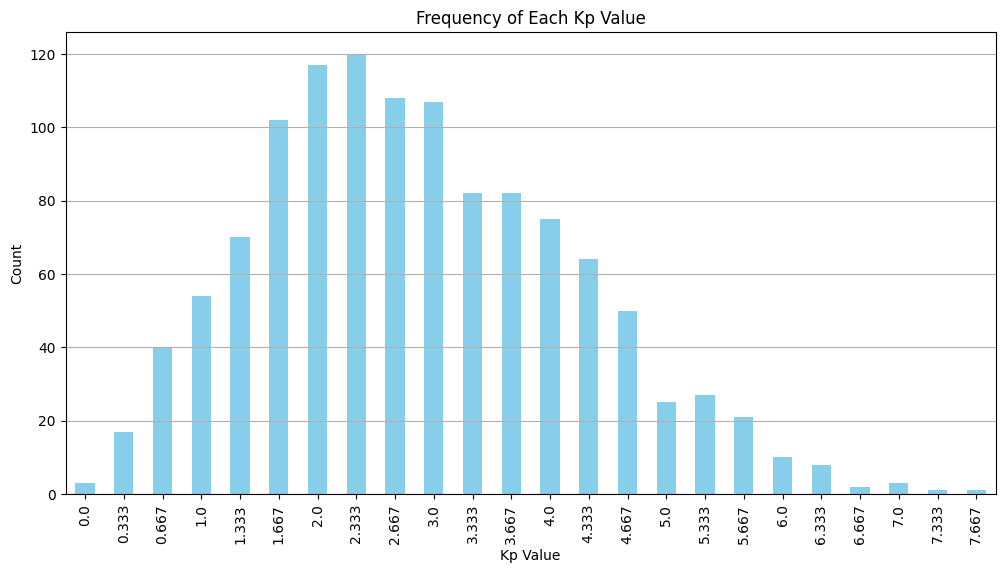

In [13]:
# Get all unique Kp values
unique_kp_values = group_df['Kp'].unique()

# Sort the values for better readability
unique_kp_values = np.sort(unique_kp_values)

# Display the number and the values
print(f"Number of unique Kp values: {len(unique_kp_values)}")
print("Unique Kp values:")
print(unique_kp_values)

# Create a bar chart showing the frequency of each unique Kp value
plt.figure(figsize=(12, 6))
group_df['Kp'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Kp Value')
plt.xlabel('Kp Value')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [14]:
# Count the number of Kp values greater than 5
count_greater_than_5 = group_df[group_df['Kp'] > 5].shape[0]

# Count the number of Kp values less than 5
count_less_than_5 = group_df[group_df['Kp'] < 5].shape[0]

print(f'Number of Kp values greater than 5: {count_greater_than_5}')
print(f'Number of Kp values less than 5: {count_less_than_5}')

Number of Kp values greater than 5: 73
Number of Kp values less than 5: 1091


In [15]:
# from sklearn.utils import resample

# # Separate the data into two groups
# group_df_high_kp = group_df[group_df['Kp'] > 5]
# group_df_low_kp = group_df[group_df['Kp'] <= 5]

# # Oversample the high Kp group to match the size of the low Kp group
# group_df_high_kp_oversampled = resample(group_df_high_kp, 
#                                         replace=True,  # Sample with replacement

#                                         n_samples=len(group_df_low_kp),
#                                         random_state=42)
# # Sort the oversampled data by the original index
# group_df_high_kp_oversampled = group_df_high_kp_oversampled.sort_index()

# # Initialize an empty DataFrame to store the balanced data
# group_df_balanced = pd.DataFrame()

# # Iterate through the original DataFrame
# for index, row in group_df.iterrows():
#     # Append the original row to the balanced DataFrame
#     group_df_balanced = pd.concat([group_df_balanced, pd.DataFrame([row])], ignore_index=False)
    
#     # If the current row has a Kp value greater than 5, append an oversampled row immediately after it
#     if row['Kp'] > 5:
#         oversampled_row = group_df_high_kp_oversampled.loc[[index]]
#         group_df_balanced = pd.concat([group_df_balanced, oversampled_row], ignore_index=False)

# # Reset the index of the balanced DataFrame
# group_df_balanced = group_df_balanced.reset_index(drop=True)


# # Combine the oversampled high Kp group with the low Kp group
# group_df_balanced = pd.concat([group_df_low_kp, group_df_high_kp_oversampled])

# print(group_df_balanced['Kp'].value_counts())

# for index, row in group_df_balanced.iterrows():
#     print(f"Index: {index}, Kp: {row['Kp']}, Images: {row['Images']}")
    
# group_df_balanced.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# # Calculate statistics of Kp values for the downsampled group_df
# kp_stats_downsampled = group_df_balanced['Kp'].describe()
# print(kp_stats_downsampled)

# # Histogram of Kp values
# plt.figure(figsize=(10, 6))
# plt.hist(group_df_balanced['Kp'], bins=20, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Kp Values (Downsampled)')
# plt.xlabel('Kp')
# plt.ylabel('Frequency')
# plt.show()

Original DataFrame size: 1189
Number of rows with Kp < 3: 631
Number of rows removed: 500
New DataFrame size: 689

Kp statistics after balancing:
count    689.000000
mean       3.621183
std        1.223902
min        0.333000
25%        3.000000
50%        3.667000
75%        4.333000
max        7.667000
Name: Kp, dtype: float64


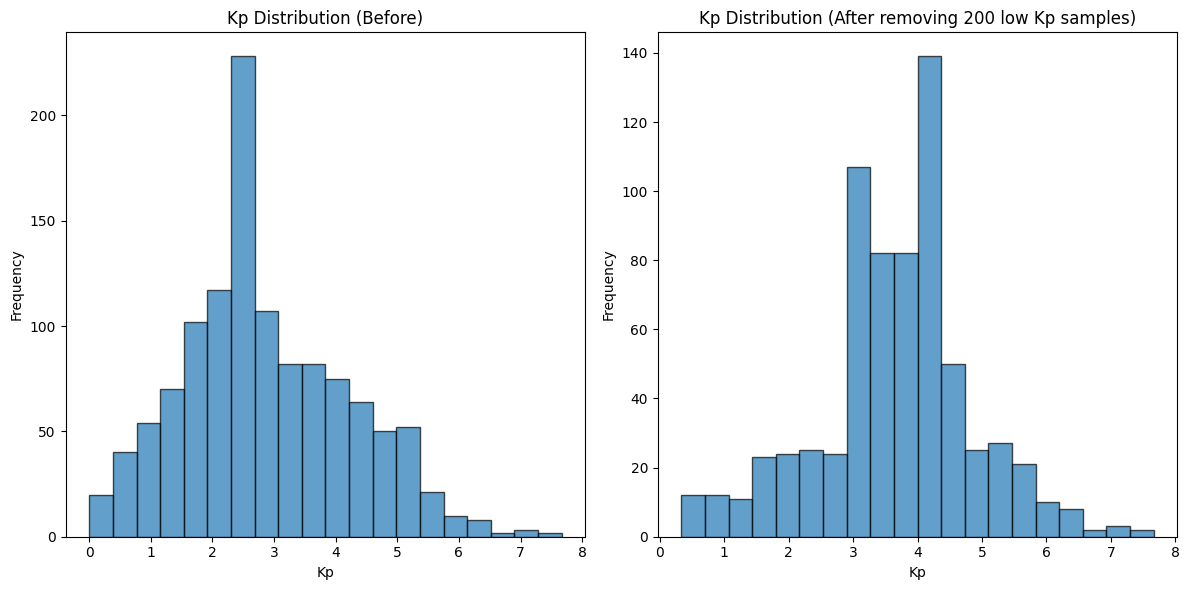

In [16]:
import random

# Identify rows with Kp < 3
low_kp_indices = group_df[group_df['Kp'] < 3].index

# Randomly select 200 rows with low Kp to remove (if there are enough)
if len(low_kp_indices) >= 500:
    indices_to_remove = random.sample(list(low_kp_indices), 500)
    # Create a new DataFrame excluding the selected rows
    group_df_balanced = group_df.drop(indices_to_remove)
    
    # Print statistics before and after
    print(f"Original DataFrame size: {len(group_df)}")
    print(f"Number of rows with Kp < 3: {len(low_kp_indices)}")
    print(f"Number of rows removed: {len(indices_to_remove)}")
    print(f"New DataFrame size: {len(group_df_balanced)}")
    
    # Calculate statistics of Kp values
    kp_stats_balanced = group_df_balanced['Kp'].describe()
    print("\nKp statistics after balancing:")
    print(kp_stats_balanced)
    
    # Save the balanced dataset
    group_df_balanced.to_csv('D:\\New folder (2)\\dataset_balanced.csv', index=False)
    
    # Plot histogram of Kp values before and after balancing
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Kp Distribution (Before)')
    plt.xlabel('Kp')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(group_df_balanced['Kp'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Kp Distribution (After removing 200 low Kp samples)')
    plt.xlabel('Kp')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough samples with Kp < 3. Only {len(low_kp_indices)} available.")

In [17]:
import timm 

timm.list_models()

['aimv2_1b_patch14_224',
 'aimv2_1b_patch14_336',
 'aimv2_1b_patch14_448',
 'aimv2_3b_patch14_224',
 'aimv2_3b_patch14_336',
 'aimv2_3b_patch14_448',
 'aimv2_huge_patch14_224',
 'aimv2_huge_patch14_336',
 'aimv2_huge_patch14_448',
 'aimv2_large_patch14_224',
 'aimv2_large_patch14_336',
 'aimv2_large_patch14_448',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coa